In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

#### This notebook was used to generate many of our final insights on the duplicate dataset.

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv("/Users/ServantezTech/Desktop/labeled_duplicates.csv", dtype=object)

<b>Number of Duplicate Groups</b>

In [4]:
data["group_id"].nunique()

622897

<b>Number of Ticket Repeats</b>
<p>First Tickets: 622897</p>
<p>Repeat Tickets: 643446</p>

In [5]:
data.groupby("is_repeat").size()

is_repeat
0    622897
1    643446
dtype: int64

Access all repeat tickets

In [4]:
data["fine_level1_amount"] = data["fine_level1_amount"].astype(int)
data["total_payments"] = data["total_payments"].astype(float)
repeats = data[data["is_repeat"] == "1"]

<b>Total Excess Fines</b>
<p>$37,198,820</p>

In [7]:
repeats["fine_level1_amount"].sum()

37198820

<b>Total Excess Paid</b>
<p>$28,288,495.03</p>

In [8]:
repeats["total_payments"].sum()

28288495.03

<b>Total Excess Paid - Expired Registration</b>
<p>$5,634,383.53</p>

In [13]:
expired = repeats[repeats["violation_code"] == "0976160F"]
expired["total_payments"].sum()

5634383.529999999

In [15]:
repeats.groupby("ward").size().sort_values(ascending=False)

ward
42    82486
44    34720
2     30175
27    30048
4     27349
43    23231
25    18223
1     17863
46    15069
28    14406
3     14055
48    13955
5     13526
49    12591
32    11630
35    11232
20    10973
16    10936
33    10495
26    10382
47    10232
6     10204
24    10133
17     9159
40     8841
15     8226
37     7923
12     7909
50     7619
29     7082
8      6901
7      6827
22     6816
30     6598
11     6568
31     6500
14     5758
21     5507
23     5039
34     4155
36     3894
39     3790
45     3619
41     3576
9      3128
10     2994
38     2412
18     1923
13     1848
19     1552
dtype: int64

<b>The graph shows the frequency of repeat tickets issued by year</b>

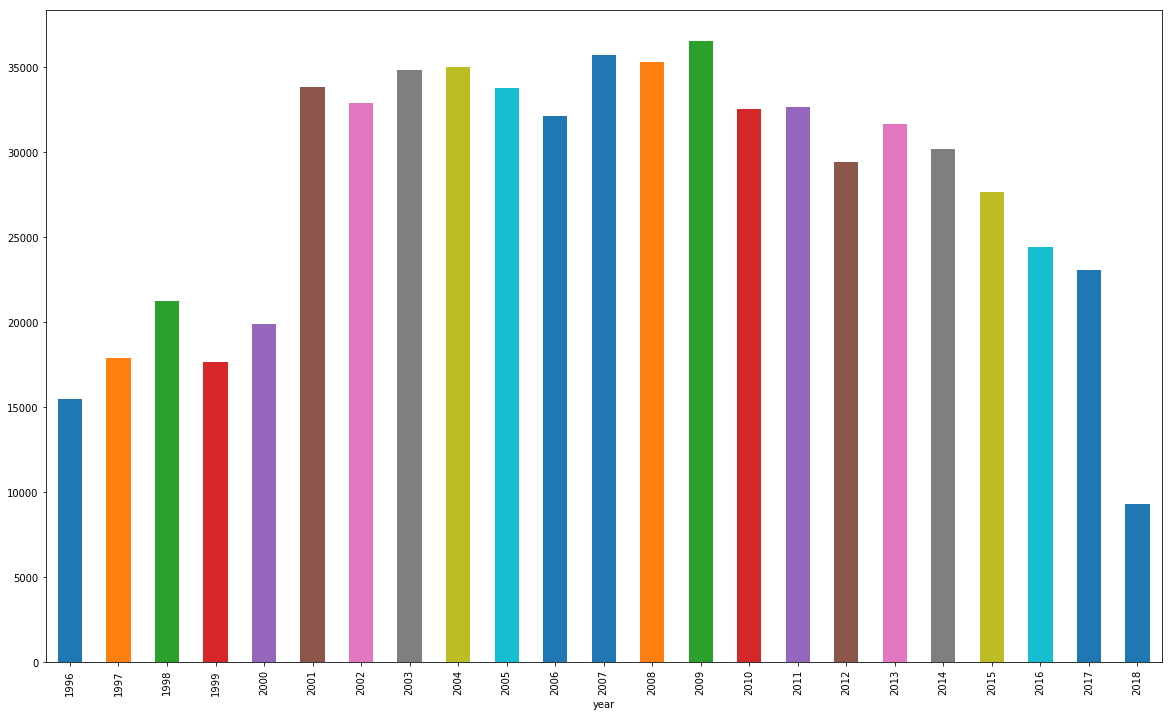

In [18]:
repeats.groupby("year").size().sort_index().plot(kind="bar", figsize=(20,12))

<b>This graph shows the outcome of repeat tickets</b>

Text(0.5, 0, '')

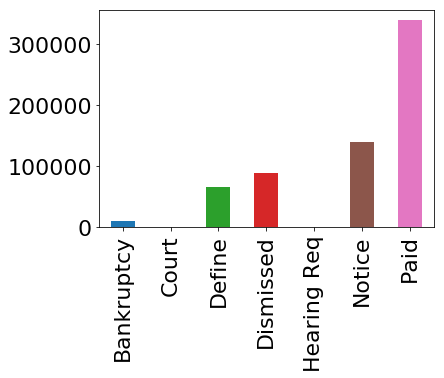

In [34]:
plot = repeats.groupby("ticket_queue").size().plot(kind='bar', x="index", y="values")
plot.set_xlabel("")

<b>Only 13.9 percent of repeat tickets have been dismissed</b>

In [25]:
repeats.groupby("ticket_queue").size()

ticket_queue
Bankruptcy       9837
Court             991
Define          65470
Dismissed       89428
Hearing Req        49
Notice         138927
Paid           338744
dtype: int64

<b>Officer 287 Strikes Again!</b>

In [28]:
repeats.groupby("officer")["total_payments"].sum().sort_values(ascending=False)

officer
287       205932.76
610       178517.61
6699      105160.80
239       101601.96
649        96821.29
201        95110.39
643        92244.01
638        85609.58
622        80284.88
251        79840.97
830        71413.31
523        70455.59
636        67393.62
13909      67190.70
92         67012.19
650        66993.82
623        66948.16
657        65238.25
15866      64796.29
634        63422.67
T165       62999.10
664        62912.53
247        62760.08
642        60873.28
721        59707.54
522        59380.49
1337       59277.91
119        59035.57
1385       58969.23
728        58244.39
641        58203.58
653        58090.77
716        57570.53
1357       57397.43
608        56591.02
289        56579.12
730        56045.14
690        53907.84
1014       53426.30
667        52849.44
869        52717.31
627        52399.54
1026       51111.34
746        51037.77
761        50845.20
9457       49407.26
745        48961.29
614        47504.87
114        47056.26
734        4

<b>This graph shows the most frequent violation codes for repeat tickets. Note: expired registration violaions are more than 4 times as frequent as no city sticker</b>

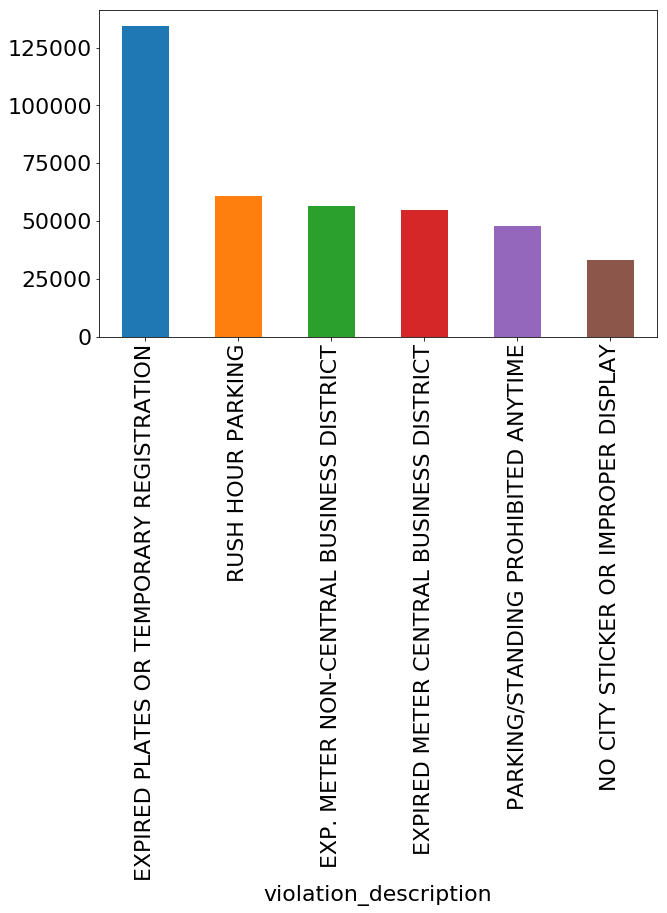

In [11]:
repeats.groupby("violation_description").size().sort_values(ascending=False)[:6].plot(kind="bar", stacked=True, figsize=(10,6), legend = False)
plt.show()

In [9]:
data.groupby("violation_description").size().sort_values(ascending=False)[:10]

violation_description
EXPIRED PLATES OR TEMPORARY REGISTRATION    264178
RUSH HOUR PARKING                           119457
EXP. METER NON-CENTRAL BUSINESS DISTRICT    110775
EXPIRED METER CENTRAL BUSINESS DISTRICT     106801
PARKING/STANDING PROHIBITED ANYTIME          93963
NO CITY STICKER OR IMPROPER DISPLAY          65703
STREET CLEANING                              62430
REAR AND FRONT PLATE REQUIRED                57580
EXPIRED METER OR OVERSTAY                    57372
STREET CLEANING OR SPECIAL EVENT             52233
dtype: int64

<b>This graph shows the officers with the highest repeat ticket counts for 2017 and 2018</b>

In [5]:
current = repeats[repeats["year"].isin(["2017", "2018"])]

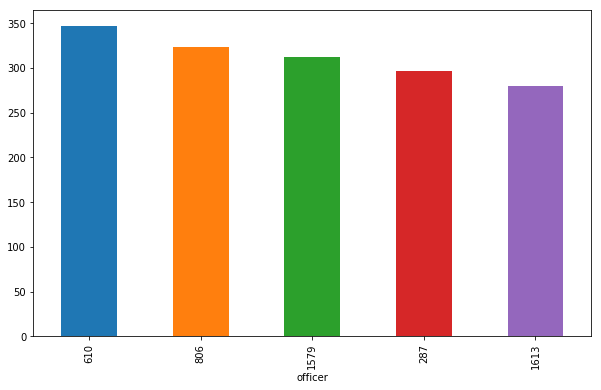

In [9]:
current.groupby("officer").size().sort_values(ascending=False)[:5].plot(kind="bar", figsize=(10,6))